In [1]:
# We'll build a language model trained on the Art of War by Sun Tzu.

In [2]:
import requests
art_of_war = requests.get('https://raw.githubusercontent.com/futuremojo/nlp-demystified/main/datasets/art_of_war.txt').text
art_of_war[:300]  # prints the first 300 characters of the text
# we have a total of 61054 characters in the text including spaces and special chars


'1. Sun Tzŭ said: The art of war is of vital importance to the State.\n\n2. It is a matter of life and death, a road either to safety or to\nruin. Hence it is a subject of inquiry which can on no account be\nneglected.\n\n3. The art of war, then, is governed by five constant factors, to be\ntaken into accou'

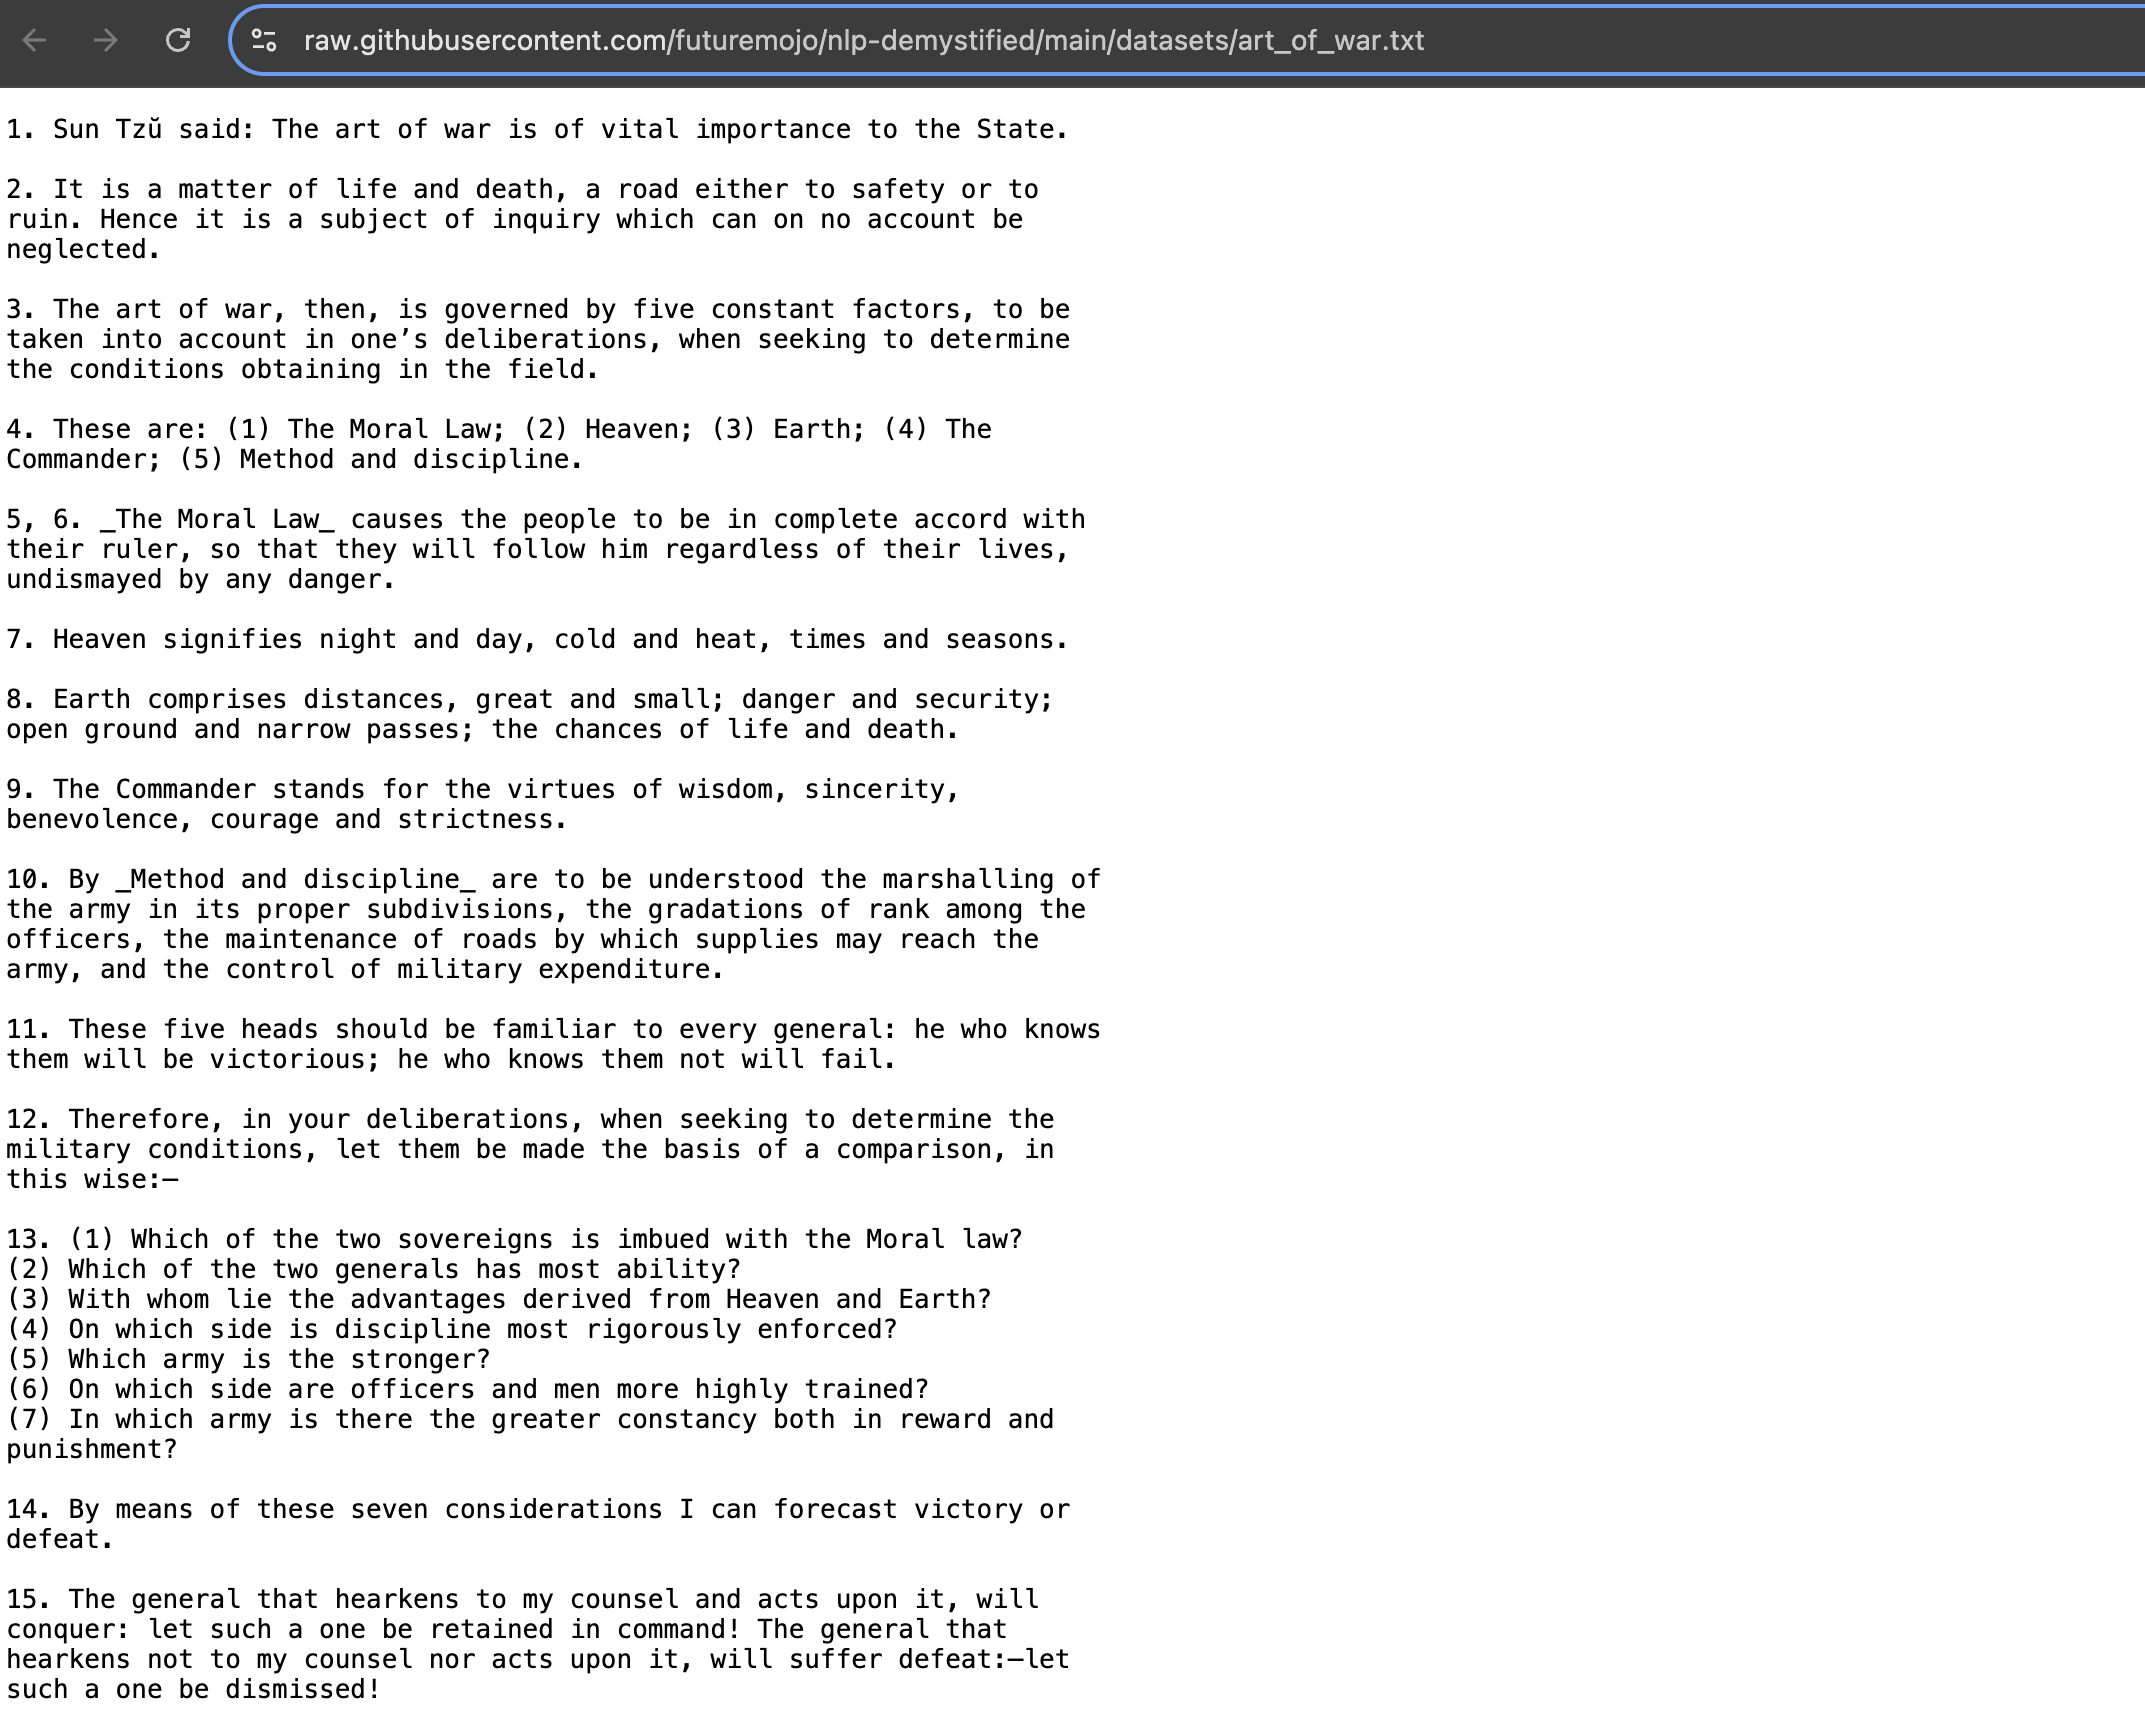

In [3]:
# The language model we'll build will be character-based (as opposed to word-based). That is, given a sequence of one or more characters, the model will be asked to predict the next character.

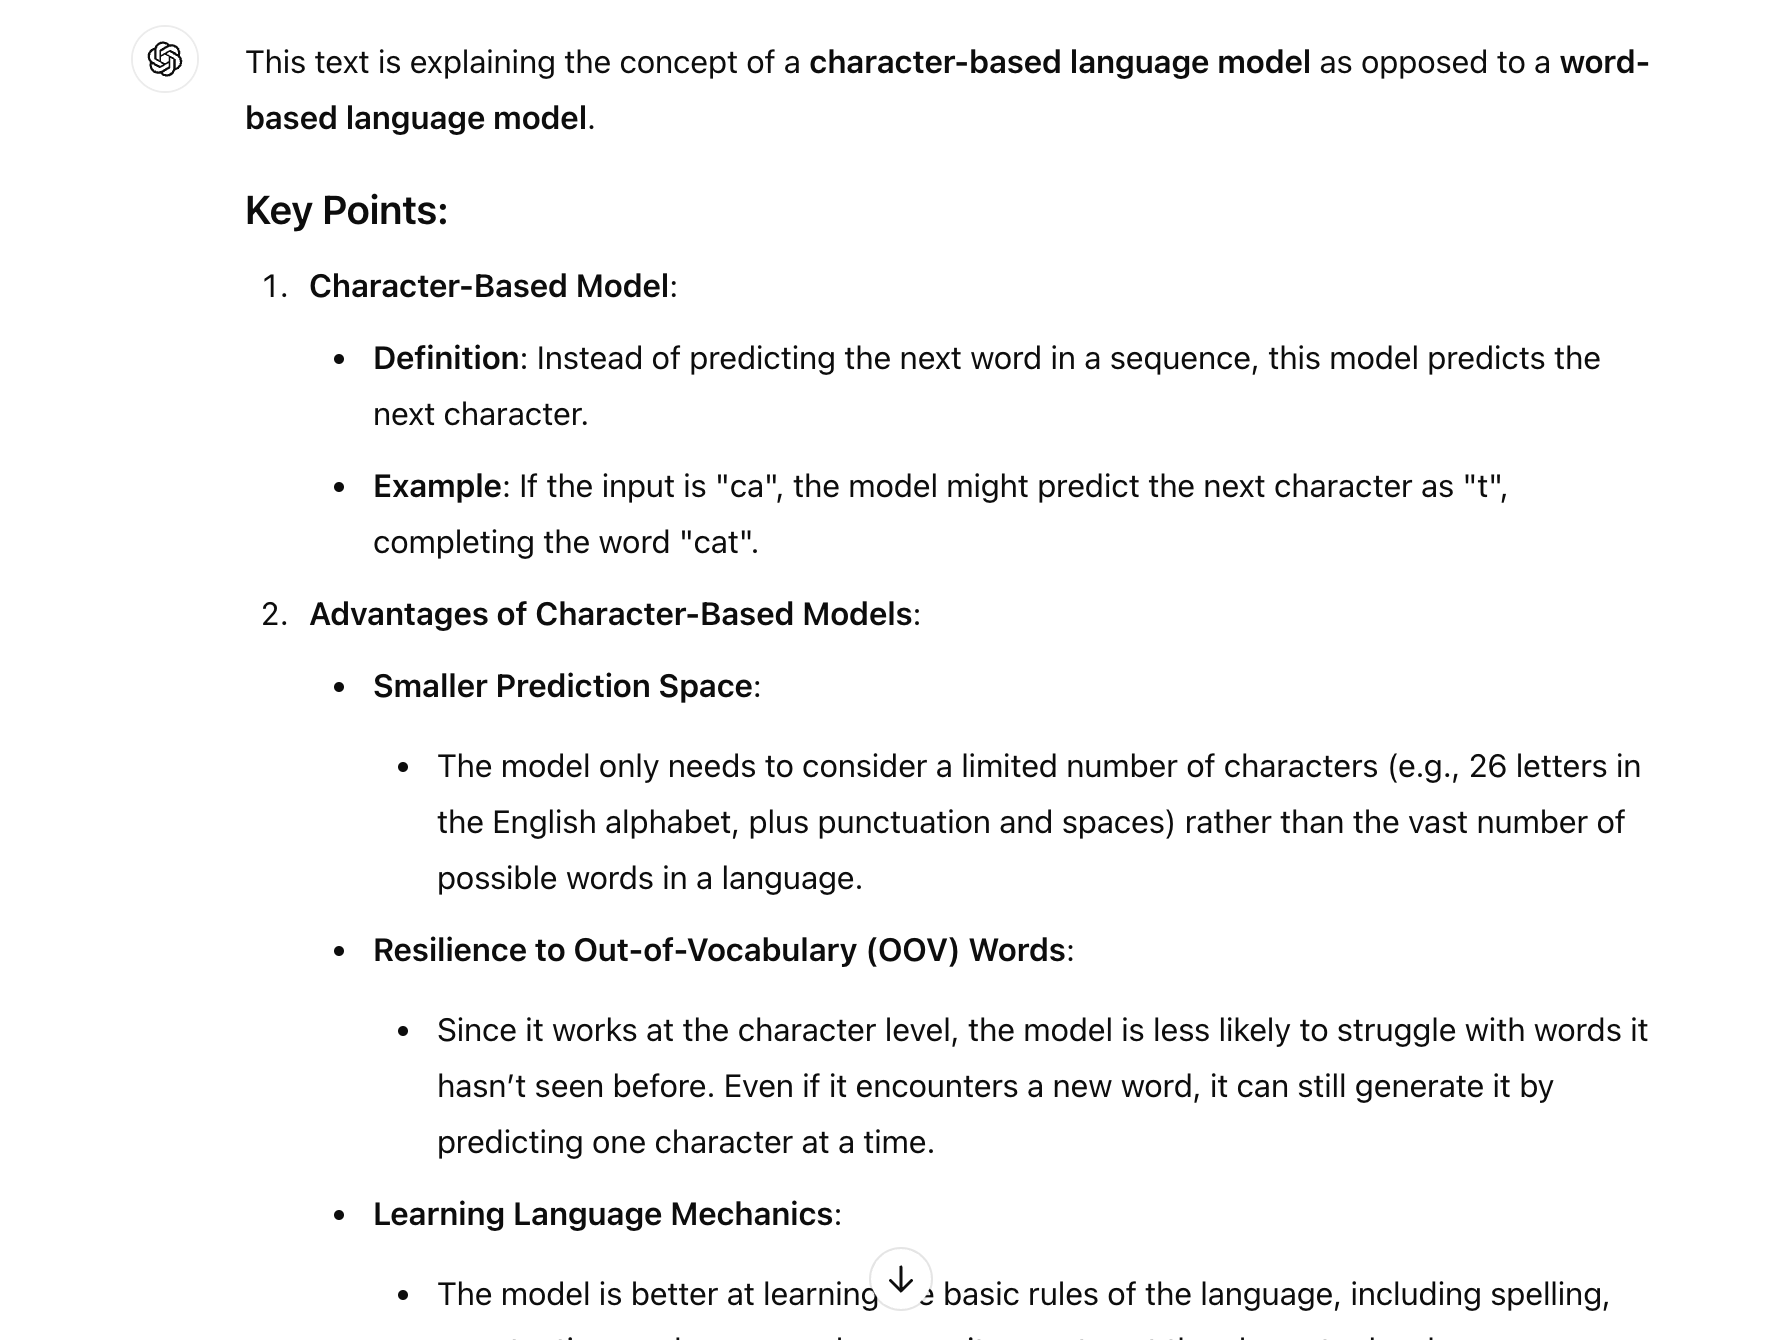

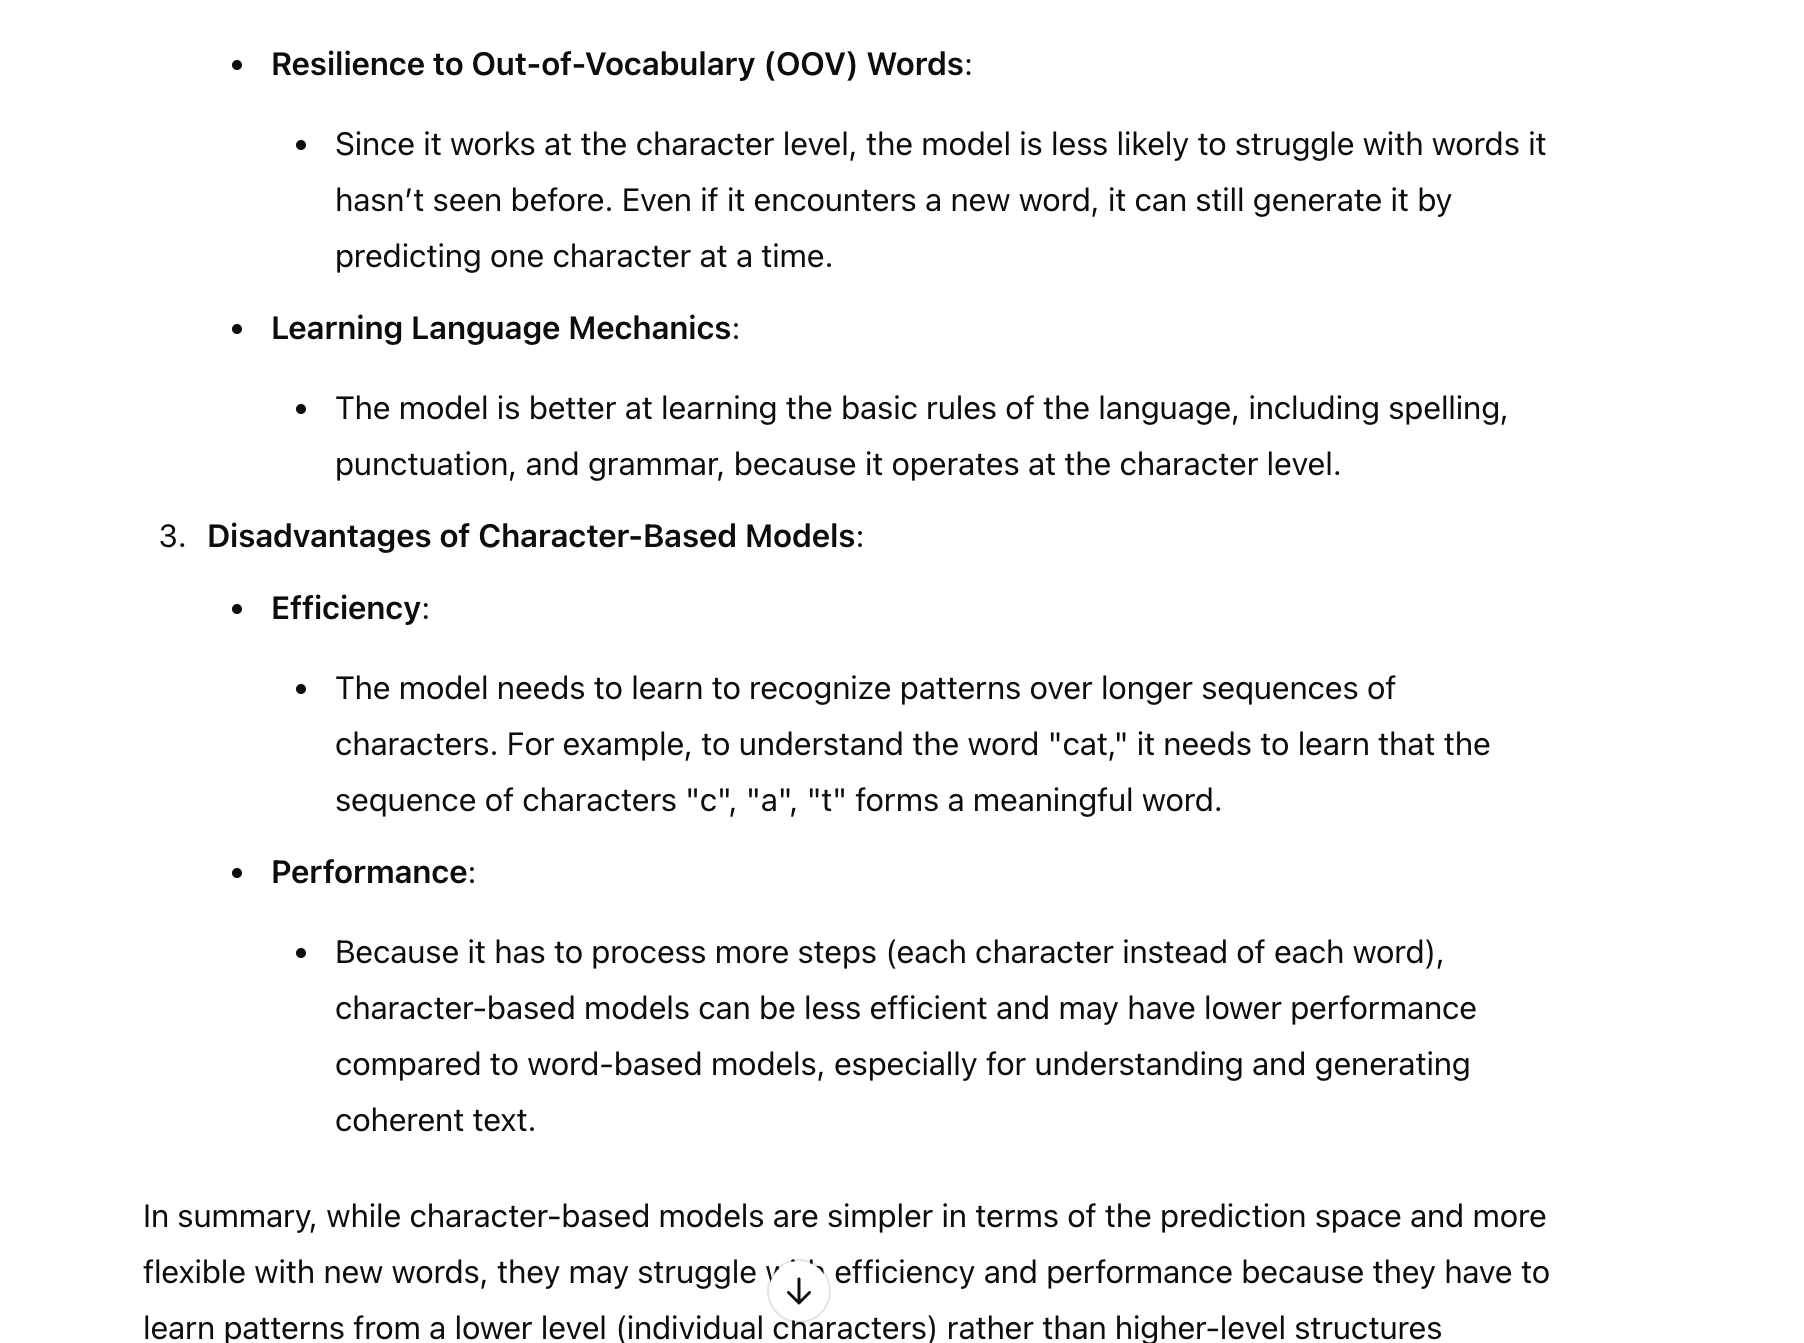

In [4]:
# We'll initialize a Keras Tokenizer and set the char_level parameter to True so that our corpus gets tokenized into characters rather than words.

import tensorflow as tf
import keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level = True)

In [5]:
tokenizer.fit_on_texts([art_of_war])  # we need to pass the art of war text as list

In [6]:
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': True,
 'oov_token': None,
 'document_count': 1,
 'word_counts': '{"1": 179, ".": 896, " ": 9794, "s": 3081, "u": 1467, "n": 3565, "t": 4398, "z": 20, "\\u016d": 13, "a": 3475, "i": 3573, "d": 1681, ":": 48, "h": 2558, "e": 5837, "r": 2776, "o": 3548, "f": 1238, "w": 981, "v": 478, "l": 1722, "m": 1201, "p": 769, "c": 1390, "\\n": 1443, "2": 127, ",": 634, "y": 1055, "b": 708, "j": 23, "q": 55, "g": 1007, "3": 87, "k": 345, "\\u2019": 57, "4": 66, "(": 59, ")": 59, ";": 168, "5": 58, "6": 51, "_": 62, "7": 39, "8": 36, "9": 34, "0": 38, "x": 49, "\\u2014": 16, "?": 8, "!": 8, "-": 57, "\\u201c": 3, "\\u201d": 3, "\\u0153": 7, "\\u00fc": 3, "\\u2018": 1}',
 'word_docs': '{"s": 1, "\\u201d": 1, "9": 1, "i": 1, "-": 1, "\\u2018": 1, "e": 1, "k": 1, "5": 1, "2": 1, "c": 1, "r": 1, "?": 1, "b": 1, "t": 1, "\\u016d": 1, "_": 1, "!": 1, "8": 1, ".": 1, "g": 1, "3": 1, ":": 1, "

In [7]:
tokenizer.word_index   # we can see each character in the text has been assigned some index
                       # we can see indexing starts from 1 because 0th index is assigned to padding hence increasinf voc size

{' ': 1,
 'e': 2,
 't': 3,
 'i': 4,
 'n': 5,
 'o': 6,
 'a': 7,
 's': 8,
 'r': 9,
 'h': 10,
 'l': 11,
 'd': 12,
 'u': 13,
 '\n': 14,
 'c': 15,
 'f': 16,
 'm': 17,
 'y': 18,
 'g': 19,
 'w': 20,
 '.': 21,
 'p': 22,
 'b': 23,
 ',': 24,
 'v': 25,
 'k': 26,
 '1': 27,
 ';': 28,
 '2': 29,
 '3': 30,
 '4': 31,
 '_': 32,
 '(': 33,
 ')': 34,
 '5': 35,
 '’': 36,
 '-': 37,
 'q': 38,
 '6': 39,
 'x': 40,
 ':': 41,
 '7': 42,
 '0': 43,
 '8': 44,
 '9': 45,
 'j': 46,
 'z': 47,
 '—': 48,
 'ŭ': 49,
 '?': 50,
 '!': 51,
 'œ': 52,
 '“': 53,
 '”': 54,
 'ü': 55,
 '‘': 56}

In [8]:
len(tokenizer.word_index)   # vocabulary size w/o padding

56

In [9]:
seq = tokenizer.texts_to_sequences([art_of_war])[0]   # texts_to_seq always gives out a list of a list [[],[],[]] if there are multiple sentences or [[]] if only one sentence is there

In [10]:
seq

[27,
 21,
 1,
 8,
 13,
 5,
 1,
 3,
 47,
 49,
 1,
 8,
 7,
 4,
 12,
 41,
 1,
 3,
 10,
 2,
 1,
 7,
 9,
 3,
 1,
 6,
 16,
 1,
 20,
 7,
 9,
 1,
 4,
 8,
 1,
 6,
 16,
 1,
 25,
 4,
 3,
 7,
 11,
 1,
 4,
 17,
 22,
 6,
 9,
 3,
 7,
 5,
 15,
 2,
 1,
 3,
 6,
 1,
 3,
 10,
 2,
 1,
 8,
 3,
 7,
 3,
 2,
 21,
 14,
 14,
 29,
 21,
 1,
 4,
 3,
 1,
 4,
 8,
 1,
 7,
 1,
 17,
 7,
 3,
 3,
 2,
 9,
 1,
 6,
 16,
 1,
 11,
 4,
 16,
 2,
 1,
 7,
 5,
 12,
 1,
 12,
 2,
 7,
 3,
 10,
 24,
 1,
 7,
 1,
 9,
 6,
 7,
 12,
 1,
 2,
 4,
 3,
 10,
 2,
 9,
 1,
 3,
 6,
 1,
 8,
 7,
 16,
 2,
 3,
 18,
 1,
 6,
 9,
 1,
 3,
 6,
 14,
 9,
 13,
 4,
 5,
 21,
 1,
 10,
 2,
 5,
 15,
 2,
 1,
 4,
 3,
 1,
 4,
 8,
 1,
 7,
 1,
 8,
 13,
 23,
 46,
 2,
 15,
 3,
 1,
 6,
 16,
 1,
 4,
 5,
 38,
 13,
 4,
 9,
 18,
 1,
 20,
 10,
 4,
 15,
 10,
 1,
 15,
 7,
 5,
 1,
 6,
 5,
 1,
 5,
 6,
 1,
 7,
 15,
 15,
 6,
 13,
 5,
 3,
 1,
 23,
 2,
 14,
 5,
 2,
 19,
 11,
 2,
 15,
 3,
 2,
 12,
 21,
 14,
 14,
 30,
 21,
 1,
 3,
 10,
 2,
 1,
 7,
 9,
 3,
 1,
 6,
 16,
 1,
 20,
 7,
 9,
 24

In [11]:
len(seq)

61054

In [12]:
tokenizer.sequences_to_texts([seq[:10]])   # if we pass first ten numbers of seq as list to text to sequence

['1 .   s u n   t z ŭ']

## converting into a tensorflow data pipeline to feed into the model

In [13]:
dataset = tf.data.Dataset.from_tensor_slices(seq)
type(dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [14]:
import numpy as np 
for data in dataset.take(10):
    print(data)

tf.Tensor(27, shape=(), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(47, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)


2024-08-23 23:39:34.100763: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
for data in dataset.take(10):
    print(data.numpy())
print('\n')
seq[:10]

27
21
1
8
13
5
1
3
47
49




2024-08-23 23:39:34.107978: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[27, 21, 1, 8, 13, 5, 1, 3, 47, 49]

In [16]:
# NOW WE WILL CONVERT OUR ENTIRE INPUT_DATA_PIPELINE INTO TRAINING EXAMPLES WITH TRAIN_X AND LABELS
# Hence we will convert it into windows

Here, we're creating windows of input_timesteps + 1. The input_timesteps represents our training example length. The +1 is there to help us create the target/label for each training example. that is from each window we'll take 0-100 as training example and its job will be to predict 1-101 sentence. which will be the input at next timestep or the next window to be fed to the rnn which enables teacher forcing

In addition, we're setting shift to 1. This means we'll get overlapping windows shifted by 1. e.g. if the input is [1, 2, 3, 4, ...]. The first window will contain [1, 2, 3, ...], the second window will contain [2, 3, 4, ...] and so on. This is so we can have more training examples.

Finally, we're setting drop_remainder to True which ensures ALL windows contain exactly N elements. i.e. once the input contains fewer than N elements, they are ignored.

In [17]:
input_timesteps = 100
window_size = input_timesteps + 1
windows = dataset.window(window_size, shift=1, drop_remainder=True)

# But our model won't accept .window because it is encrypted. It'll accept only tensors,
# so we need to extract the tensors from each window. 
# To do that, we'll use flat_map which will flatten the dataset of datasets into a single dataset of elements. 
# But because we want to retain our segmented sequences, we'll also pass in a batch function to maintain the segments

windows = windows.flat_map(lambda window: window.batch(window_size))

We now have a single dataset of tensors, where each tensor is input_timesteps+1 long and shifted by 1.

In [18]:
for window in windows.take(3):
    print(len(window), window)
    print('\n')

101 tf.Tensor(
[27 21  1  8 13  5  1  3 47 49  1  8  7  4 12 41  1  3 10  2  1  7  9  3
  1  6 16  1 20  7  9  1  4  8  1  6 16  1 25  4  3  7 11  1  4 17 22  6
  9  3  7  5 15  2  1  3  6  1  3 10  2  1  8  3  7  3  2 21 14 14 29 21
  1  4  3  1  4  8  1  7  1 17  7  3  3  2  9  1  6 16  1 11  4 16  2  1
  7  5 12  1 12], shape=(101,), dtype=int32)


101 tf.Tensor(
[21  1  8 13  5  1  3 47 49  1  8  7  4 12 41  1  3 10  2  1  7  9  3  1
  6 16  1 20  7  9  1  4  8  1  6 16  1 25  4  3  7 11  1  4 17 22  6  9
  3  7  5 15  2  1  3  6  1  3 10  2  1  8  3  7  3  2 21 14 14 29 21  1
  4  3  1  4  8  1  7  1 17  7  3  3  2  9  1  6 16  1 11  4 16  2  1  7
  5 12  1 12  2], shape=(101,), dtype=int32)


101 tf.Tensor(
[ 1  8 13  5  1  3 47 49  1  8  7  4 12 41  1  3 10  2  1  7  9  3  1  6
 16  1 20  7  9  1  4  8  1  6 16  1 25  4  3  7 11  1  4 17 22  6  9  3
  7  5 15  2  1  3  6  1  3 10  2  1  8  3  7  3  2 21 14 14 29 21  1  4
  3  1  4  8  1  7  1 17  7  3  3  2  9  1  6 16  1 11  4 

In [19]:
# NOW LETS DO SOME BATCHING
batch_size = 32
batches = windows.shuffle(10000).batch(batch_size)

In [20]:
for data in batches.take(2):
    print(data)

tf.Tensor(
[[22 11  2 ...  7  9 17]
 [12  4  8 ...  1  3 10]
 [ 2  2 17 ... 17 13  8]
 ...
 [14 14 29 ... 25  4 15]
 [ 9 12  8 ...  2  1  9]
 [19 28  1 ...  3 10 18]], shape=(32, 101), dtype=int32)
tf.Tensor(
[[ 6 16  1 ...  7 12  1]
 [17  4  8 ... 15  2  8]
 [14  3 10 ... 20 10  2]
 ...
 [ 9  2 24 ...  9  4  6]
 [ 6  5  8 ...  6  9  7]
 [ 3  2 12 ... 20  7  9]], shape=(32, 101), dtype=int32)


2024-08-23 23:39:34.970838: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


NOW BATCHES CONTAIN BATCH WHERE EACH BATCH HAS 32 UNITS AND EACH UNIT HAS 101 LENGTH

We can now separate each example into an input sequence(x) and a corresponding label/target sequence(y)

Teacher Forcing:

At each timestep during training, the output is compared to a label.
At the next timestep, rather than feeding the model the previous output, we feed it the next character of the input sequence (i.e. what the model should've outputted).

This is why each sequence is of size input_timesteps + 1. Each sequence is now going to be separated into TWO sequences. The first sequence will be the training input and will be of length input_timesteps (i.e. everything but the LAST character). The second sequence will be the label/target and will consist of all the sequence elements shifted by 1 (i.e. everything but the FIRST character). If this is confusing, refer to the accompanying video for this module where we cover training language models.


So if a sequence is "she swam in the lake", then:

The input will be "she swam in the lak" (drop the last character)
The target/label will be "he swam in the lake" (drop the first character)



In [21]:
xy_batches = batches.map(lambda batch: (batch[:, :-1], batch[:, 1:]))  # this is saying convert each batch into two instances , one will be i/p and other will be o/p

In [22]:
for b in xy_batches.take(1): 
  print(b)                     # we can see now, each batch contains two arrays one will be input and the other array is output corresponding to those inputs 

(<tf.Tensor: shape=(32, 100), dtype=int32, numpy=
array([[ 3,  5,  2, ...,  6, 22,  2],
       [ 4,  5, 19, ..., 12,  1, 11],
       [ 7,  4,  3, ...,  9,  2, 22],
       ...,
       [ 3, 10,  9, ..., 20,  6,  9],
       [ 8, 21, 14, ..., 16,  1, 17],
       [ 1,  7,  3, ...,  7,  9, 17]], dtype=int32)>, <tf.Tensor: shape=(32, 100), dtype=int32, numpy=
array([[ 5,  2,  8, ..., 22,  2,  9],
       [ 5, 19,  1, ...,  1, 11,  4],
       [ 4,  3,  8, ...,  2, 22,  7],
       ...,
       [10,  9,  2, ...,  6,  9,  5],
       [21, 14, 14, ...,  1, 17,  7],
       [ 7,  3,  1, ...,  9, 17, 18]], dtype=int32)>)


In [23]:
# For greater clarity, this is the first input sequence from the first batch,
# and it's corresponding label/target sequence.
for b in xy_batches.take(1):
    print("x1 length: ", len(b[0][0].numpy()))
    print("x1: ", b[0][0].numpy())
    print("\n")
    print("y1 length: ", len(b[1][0].numpy()))
    print("y1: ", b[1][0].numpy())

x1 length:  100
x1:  [ 3 20  2  5  3 18  1  6 16  1  6  5  2 36  8 14  6 20  5 24  1  7  5 12
  1 11  4 26  2 20  4  8  2  1  7  1  8  4  5 19 11  2  1 22  4 15 13 11
  1  6 16  1 10  4  8  1 22  9  6 25  2  5 12  2  9  1  4  8  1  2 38 13
  4 25  7 11  2  5  3  1  3  6 14  3 20  2  5  3 18  1 16  9  6 17  1  6
  5  2 36  8]


y1 length:  100
y1:  [20  2  5  3 18  1  6 16  1  6  5  2 36  8 14  6 20  5 24  1  7  5 12  1
 11  4 26  2 20  4  8  2  1  7  1  8  4  5 19 11  2  1 22  4 15 13 11  1
  6 16  1 10  4  8  1 22  9  6 25  2  5 12  2  9  1  4  8  1  2 38 13  4
 25  7 11  2  5  3  1  3  6 14  3 20  2  5  3 18  1 16  9  6 17  1  6  5
  2 36  8  1]


In [24]:
# NOW BEFORE PUTTING IT INTO A MODEL WE WILL ONE HOT ENCODE OUR INPUT
# we will use one hot encoding rather than embedding is because input is just a character rather than a word so 
# there is no smenatic mean as such plus the number of vharcters are 56 something so we can get away w it

In [25]:
num_chars = len(tokenizer.word_index) + 1   # 1 is for padding or unknown tokens that might get zero index
xy_batches = xy_batches.map(lambda inputs, labels: (tf.one_hot(inputs, depth=num_chars), labels))

 Each input sequence is now a sequence of one-hot encodings.

In [26]:
for b in xy_batches.take(1):
    print("x1 length: ", len(b[0][0].numpy()))
    print("depth_length", len(b[0][0][0].numpy()))
    print("x1: ", b[0][0].numpy())
    print("\n")
    print("y1 length: ", len(b[1][0].numpy()))
    print("y1: ", b[1][0].numpy())

x1 length:  100
depth_length 57
x1:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


y1 length:  100
y1:  [10  2  1  7  8  8  7 13 11  3  1 11  4 26  2  1  8 20  7  9 17  4  5 19
  1  7  5  3  8 24  1 20  4  3 10  1  3 10  2  1  9  2  8 13 11  3  1  3
 10  7  3  1  6  5  2 37  3 10  4  9 12  1  6 16 14 10  4  8  1 17  2  5
  1  7  9  2  1  8 11  7  4  5 24  1 20 10  4 11  2  1  3 10  2  1  3  6
 20  5  1  8]


In [27]:
# The last step is to add some prefetching. This is an optimization step. This way, while the model trains on the current batch of data, the pipeline reads and prepares the next batch.

In [28]:
dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [29]:
# We're stacking two LSTMs. The sequential output of the first LSTM will become the sequential input to the second LSTM.

In [30]:
# and we will use sparse categorical cross entropy rather than categorical cross entropy because as there will be 100 
# outputs CCE would convert each output to an array of 0s and 1s For a classification problem with 4 possible classes, 
# if the true class is class 2, the label would be represented as [0, 1, 0, 0], hence if we have 56 possible characters to 
# be outputed it will be messy
# sparse CCE directly outputs the integer

In [31]:
model = keras.models.Sequential()

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[None, num_chars], recurrent_dropout=0.2))
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[None, num_chars], recurrent_dropout=0.2))

model.add(tf.keras.layers.Dense(num_chars, activation='softmax'))  # this is the output layer, it will contain neurons
                                                                   # equal to possible number of output chars

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 128)      │        95,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 57)       │         7,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,169 (914.72 KB)

 Trainable params: 234,169 (914.72 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
filepath="/Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                 save_weights_only=True,
                                                 verbose=1)

In [34]:
history = model.fit(xy_batches, epochs=50, callbacks=[cp_callback])

Epoch 1/50
   1905/Unknown 201s 104ms/step - loss: 2.5639
Epoch 1: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 201s 104ms/step - loss: 2.5637
Epoch 2/50


2024-08-23 23:42:57.744552: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1.7664
Epoch 2: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 200s 105ms/step - loss: 1.7664
Epoch 3/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.5179
Epoch 3: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 221s 115ms/step - loss: 1.5179
Epoch 4/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.3360
Epoch 4: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 210s 110ms/step - loss: 1.3360
Epoch 5/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1.1911
Epoch 5: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 217s 114ms/step - loss: 1.1911
Epoch 6/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1.0793
Epoch 6: saving model to /Users/arsh/Desktop

2024-08-24 00:14:36.443851: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.8047
Epoch 10: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 248s 130ms/step - loss: 0.8047
Epoch 11/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.7619
Epoch 11: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 221s 116ms/step - loss: 0.7619
Epoch 12/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.7239
Epoch 12: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 219s 114ms/step - loss: 0.7239
Epoch 13/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.6926
Epoch 13: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 238s 125ms/step - loss: 0.6925
Epoch 14/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.6632
Epoch 14: saving model to /Users/ars

2024-08-24 01:17:35.788050: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.4649
Epoch 26: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 243s 127ms/step - loss: 0.4649
Epoch 27/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.4563
Epoch 27: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 219s 115ms/step - loss: 0.4562
Epoch 28/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.4470
Epoch 28: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 235s 123ms/step - loss: 0.4470
Epoch 29/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.4381
Epoch 29: saving model to /Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/model.weights.h5
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 208s 109ms/step - loss: 0.4381
Epoch 30/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.4315
Epoch 30: saving model to /Users/ars

In [35]:
model.save("/Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/art_of_war_char_level_lm.keras")

In [36]:
# loading the model from our pc

model = keras.models.load_model('/Users/arsh/Desktop/ML AI Abhijeet Sir/RESOURCES/art_of_war_char_level_lm.keras')

In [49]:
def generate_text(model, tokenizer, seed_text, num_char_req=200, temperature=1):

    text = seed_text  

    for _ in range(num_char_req):
        # Take the last *input_timesteps* number of characters in the text so far
        # as input.
        input = np.array(tokenizer.texts_to_sequences([text[-input_timesteps:]]))
        input = tf.one_hot(input, num_chars)

        # Create probability distribution for next character adjusted by temperature.
        preds = model.predict(input)[0, -1:, :] # <-- We want only the last character so we're extracting the softmax output for that.
        preds = tf.math.log(preds) / temperature

        # Sample next character and add to running text.
        next_char = tf.random.categorical(preds, num_samples=1)
        next_char = tokenizer.sequences_to_texts(next_char.numpy())[0]

        text += next_char

    return text


In [50]:
print(generate_text(model, tokenizer, "Banana peels on the battlefield can", num_char_req=300, temperature=0.2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [48]:
print(generate_text(model, tokenizer, "When a warlike prince attacks a powerful state", num_char_req=500, temperature=0.2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━